# IRIS FLOWER CLASSIFICATION ML PROJECT

# Importing Modules

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Loading Iris Dataset

In [3]:
df=pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#changing column names
df.columns=["sepal_length_cm","sepal_width_cm","petal_length_cm", "petal_width_cm", "Species"]
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Stats

In [5]:
df.shape

(150, 5)

In [6]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   Species          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


 # Preprocessing and Exploratory Data Analysis:

In [8]:
df.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
Species            0
dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

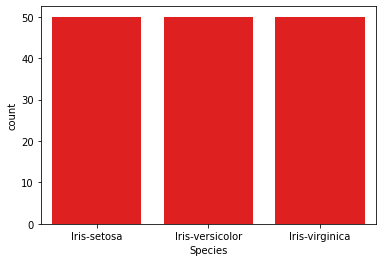

In [9]:
sns.countplot(x='Species',data=df,color='red')

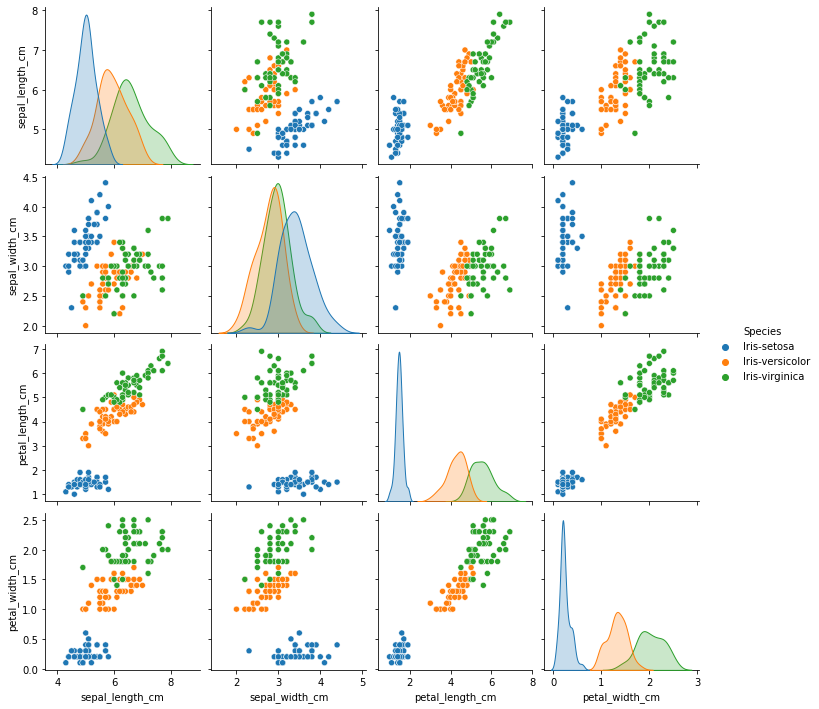

In [10]:
sns.pairplot(df,hue='Species')

In [11]:
df.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.109369,0.871754,0.817954
sepal_width_cm,-0.109369,1.000000,-0.420516,-0.356544
petal_length_cm,0.871754,-0.420516,1.000000,0.962757
petal_width_cm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

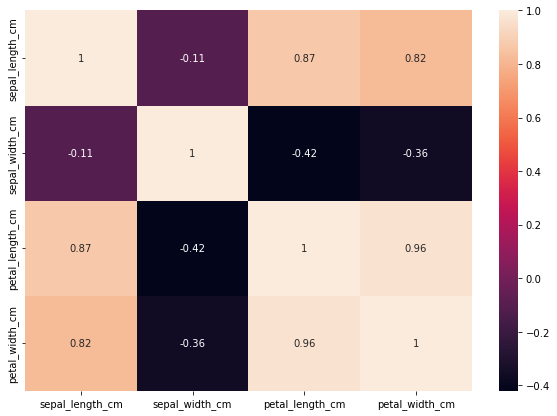

In [23]:
plt.figure(figsize=(10,7))
co_relation= df.corr()
sns.heatmap(data=co_relation,annot=True)

# Label Encoder

In [24]:
le= LabelEncoder()

In [25]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df["Species"]= le.fit_transform(df["Species"])
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
df["Species"].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

# 

# Splitting data into test set and train set

In [28]:
X= df.drop(columns=["Species"])
y=df["Species"]

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=71)

# Model Evaluation

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [124]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print("Accuracy for Logistic Regression is", accuracy_score(y_test, prediction)*100)

Accuracy for Logistic Regression is 96.66666666666667


In [131]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print("Accuracy for KNN  is", accuracy_score(y_test, prediction)*100)


Accuracy for KNN  is 96.66666666666667


In [130]:
model = SVC()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print("Accuracy for Support Vector Classifier is",accuracy_score(y_test, prediction)*100)

Accuracy for Support Vector Classifier is 96.66666666666667


In [127]:
model = GaussianNB()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print("Accuracy for Naive Bayes is",accuracy_score(y_test, prediction)*100)

Accuracy for Naive Bayes is 96.66666666666667


In [128]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print("Accuracy for Decision Tree  is", accuracy_score(y_test, prediction)*100)

Accuracy for Decision Tree  is 93.33333333333333


In [129]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print("Accuracy for Random Forest is",accuracy_score(y_test, prediction)*100)

Accuracy for Random Forest is 96.66666666666667
